Il faut forcer un des agents à fixer un prix bas pour voir comment il réagit

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

#.py
from core import qlearning as q
from core import best_response_grid as br

In [1]:
agents = [q.Agent() for _ in range(2)]
env = q.Env()

NameError: name 'q' is not defined

In [6]:
final_q_matrices = []
times = []
rewards = []
epsilon = []
prices = []

# Initialization of prices p0 (done directly in each agent)
for agent in agents:
    agent.p = np.random.choice(agent.A)

# Initialization of state
s_t = env([agent.p for agent in agents])[1]
for agent in agents:
    agent.s_t = s_t
s_ind = agents[0].find_index(agents[0].s_t)
for agent in agents:
    agent.s_ind = s_ind

# Iterative phase
for t in range(10**6):
    # Actions and state at t+1
    for agent in agents:
        agent.a_ind = agent.get_next_action()

    s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
    for agent in agents:
        agent.s_t1 = s_t1
        
    s_ind1 = agents[0].find_index(agents[0].s_t1)
    for agent in agents:
        agent.s_ind1 = s_ind1

    times.append(t)
    ret = env(s_t1)
    quant, price, cost = ret

    re = ret[0]*ret[1]-ret[0]*ret[2]
    rewards.append(re)
    epsilon_values = [agent.epsilon for agent in agents]
    epsilon.append(epsilon_values)
    prices.append([agent.p for agent in agents])

    for i, agent in enumerate(agents):
        agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)


aggregated_agents = np.array(rewards).mean(axis=0)

for agent in agents:
    final_q_matrices.append(agent.Q.copy()) # retrieve the matrix

Rewards: [array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622])]
Prices: [[1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6

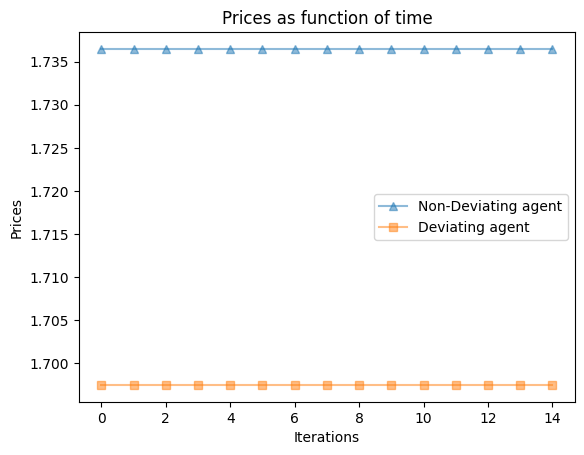

In [7]:
game_rewards = []

rewards = []  # Store rewards for each game simulation step
prices = []
    
# Game simulation
for t in range(15):  # Change the number of steps if necessary
    # Agents' actions (deterministic policy)
    for agent in agents:
        agent.a_ind = agent.Q[:, agent.s_ind].argmax() # This changes, we no longer use epsilon-greedy 
        
    # Next state and reward
    s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
    ret = env(s_t1)
    quant, price, cost = ret

    re = ret[0]*ret[1]-ret[0]*ret[2]
    rewards.append(re)
    prices.append(price)
        
    # Update state for the next step
    s_t = s_t1
    for agent in agents:
        agent.s_t = s_t
    s_ind1 = agents[0].find_index(s_t1)
    for agent in agents:
        agent.s_ind1 = s_ind1
    
    for i, agent in enumerate(agents):
        agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
    

print(f"Rewards: {rewards}")
print(f"Prices: {prices}")

non_dev_p = []
dev_p = []
for i in range(len(prices)):
    non_dev_p.append(prices[i][0])
    dev_p.append(prices[i][1])
plt.plot(range(len(prices)),non_dev_p, label=f"Non-Deviating agent", marker='^',alpha=0.5)
plt.plot(range(len(prices)), dev_p, label=f"Deviating agent", marker='s', alpha=0.5)

plt.xlabel("Iterations")
plt.ylabel("Prices")
plt.title("Prices as function of time")
plt.legend()
plt.show()

Rewards: [array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.42308559, 0.21866416]), array([0.31359405, 0.31359405]), array([0.21437757, 0.25068303]), array([0.24589853, 0.1964421 ]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622])]
Prices: [[1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.970461374698752], [1.7364794332811537, 1.7364794332811537], [1.541494482099822, 1.463

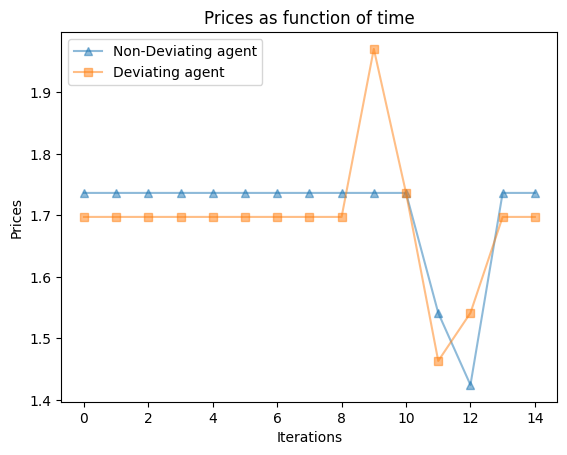

In [8]:
game_rewards = []

rewards = []  # Store rewards for each game simulation step
prices = []
    
# Game simulation
for t in range(15):  # Change the number of steps if necessary
    if t == 9: 
        # Agents' actions (deterministic policy)
        agents[0].a_ind = agents[0].Q[:, agents[0].s_ind].argmax() # This changes, we no longer use epsilon-greedy 
        agents[1].a_ind = agents[1].m - 1 #increases its price
        
        # Next state and reward
        s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
        ret = env(s_t1)
        quant, price, cost = ret

        re = ret[0]*ret[1]-ret[0]*ret[2]
        rewards.append(re)
        prices.append(price)
        
        # Update state for the next step
        s_t = s_t1
        for agent in agents:
            agent.s_t = s_t
        s_ind1 = agents[0].find_index(s_t1)
        for agent in agents:
            agent.s_ind1 = s_ind1
    
        for i, agent in enumerate(agents):
            agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
        
    else:
        # Agents' actions (deterministic policy)
        for agent in agents:
            agent.a_ind = agent.Q[:, agent.s_ind].argmax() # This changes, we no longer use epsilon-greedy 
        
        # Next state and reward
        s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
        ret = env(s_t1)
        quant, price, cost = ret

        re = ret[0]*ret[1]-ret[0]*ret[2]
        rewards.append(re)
        prices.append(price)
        
        # Update state for the next step
        s_t = s_t1
        for agent in agents:
            agent.s_t = s_t
        s_ind1 = agents[0].find_index(s_t1)
        for agent in agents:
            agent.s_ind1 = s_ind1
    
        for i, agent in enumerate(agents):
            agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
    

print(f"Rewards: {rewards}")
print(f"Prices: {prices}")

non_dev_p = []
dev_p = []
for i in range(len(prices)):
    non_dev_p.append(prices[i][0])
    dev_p.append(prices[i][1])
plt.plot(range(len(prices)),non_dev_p, label=f"Non-Deviating agent", marker='^',alpha=0.5)
plt.plot(range(len(prices)), dev_p, label=f"Deviating agent", marker='s', alpha=0.5)

plt.xlabel("Iterations")
plt.ylabel("Prices")
plt.title("Prices as function of time")
plt.legend()
plt.show()

Rewards: [array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622]), array([0.15243143, 0.30602215]), array([0.23254261, 0.25222441]), array([0.28043792, 0.20083569]), array([0.24589853, 0.1964421 ]), array([0.29256439, 0.32384622]), array([0.29256439, 0.32384622])]
Prices: [[1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.6974824430448874], [1.7364794332811537, 1.424503511391023], [1.541494482099822, 1.5024974918635556], [1.4635005016272893, 1.619

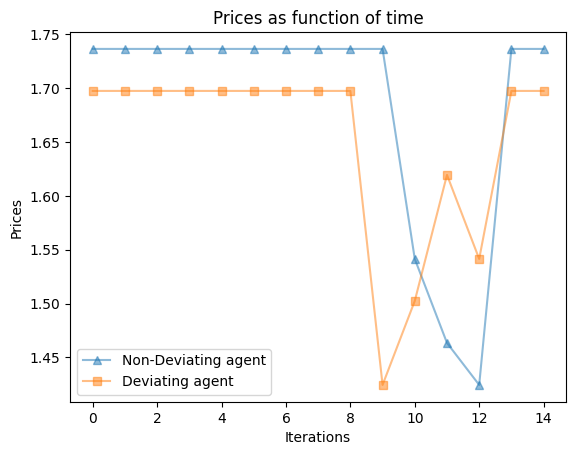

In [9]:
game_rewards = []

rewards = []  # Store rewards for each game simulation step
prices = []
    
# Game simulation
for t in range(15):  # Change the number of steps if necessary
    if t == 9: 
        # Agents' actions (deterministic policy)
        agents[0].a_ind = agents[0].Q[:, agents[0].s_ind].argmax() # This changes, we no longer use epsilon-greedy 
        agents[1].a_ind = 0 #decreases its price
        
        # Next state and reward
        s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
        ret = env(s_t1)
        quant, price, cost = ret

        re = ret[0]*ret[1]-ret[0]*ret[2]
        rewards.append(re)
        prices.append(price)
        
        # Update state for the next step
        s_t = s_t1
        for agent in agents:
            agent.s_t = s_t
        s_ind1 = agents[0].find_index(s_t1)
        for agent in agents:
            agent.s_ind1 = s_ind1
    
        for i, agent in enumerate(agents):
            agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
        
    else:
        # Agents' actions (deterministic policy)
        for agent in agents:
            agent.a_ind = agent.Q[:, agent.s_ind].argmax() # This changes, we no longer use epsilon-greedy 
        
        # Next state and reward
        s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
        ret = env(s_t1)
        quant, price, cost = ret

        re = ret[0]*ret[1]-ret[0]*ret[2]
        rewards.append(re)
        prices.append(price)
        
        # Update state for the next step
        s_t = s_t1
        for agent in agents:
            agent.s_t = s_t
        s_ind1 = agents[0].find_index(s_t1)
        for agent in agents:
            agent.s_ind1 = s_ind1
    
        for i, agent in enumerate(agents):
            agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
    

print(f"Rewards: {rewards}")
print(f"Prices: {prices}")

non_dev_p = []
dev_p = []
for i in range(len(prices)):
    non_dev_p.append(prices[i][0])
    dev_p.append(prices[i][1])
plt.plot(range(len(prices)),non_dev_p, label=f"Non-Deviating agent", marker='^',alpha=0.5)
plt.plot(range(len(prices)), dev_p, label=f"Deviating agent", marker='s', alpha=0.5)

plt.xlabel("Iterations")
plt.ylabel("Prices")
plt.title("Prices as function of time")
plt.legend()
plt.show()